<a href="https://colab.research.google.com/github/ItalianPepper/coronavirus_ita_svr/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tot dataset: 14


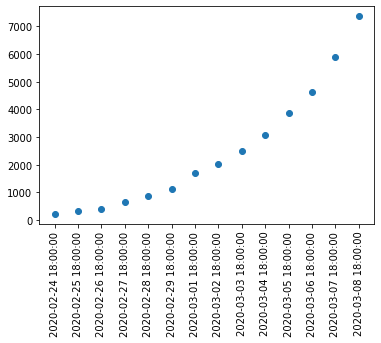

Ultimo aggiornamento del  2020-03-08 18:00:00 , numero di persone contagiate: 7375
Previsioni per il prossimo giorno: [9268.63584824]


In [179]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR
import numpy as np
import os.path

# Download .csv file from official profile of Protezione Civile.
raw_git_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
csv_name = "dpc-covid19-ita-andamento-nazionale.csv"

if not os.path.exists("./dpc-covid19-ita-andamento-nazionale.csv"):
  urllib.request.urlretrieve(raw_git_url, csv_name)

df_ita_covid = pd.read_csv(csv_name, sep=",", header=0)
tot_casi_col = df_ita_covid["totale_casi"].tolist()
dates_col = df_ita_covid["data"].tolist()

print("Tot dataset:", len(tot_casi_col))

# Plotting time series.
plt.plot_date(dates_col, tot_casi_col, xdate=True)
plt.xticks(rotation=90)
plt.show()
plt.close()

look_back = 7

x_mod = []
y_mod = []

for i in range(look_back, len(tot_casi_col)):
  # Example look_back = 3:
  # -> i = 3:
  # x = {v[0], v[1], v[2]}
  # y = {v[3]}
  #
  # -> i = 4:
  # x = {v[1], v[2], v[3]}
  # y = {v[4]}
  # ecc...

  x_sample = tot_casi_col[i-look_back:i]
  
  y_sample = tot_casi_col[i]
  
  x_mod.append(x_sample)
  y_mod.append(y_sample)

# X for next predictions is equal to last element of train set less the first
# element of that vector. Then adding the last value of y.
x_tmp = x_mod[len(x_mod)-1]
y_tmp = y_mod[len(y_mod)-1]
last_x = [x_tmp[i] for i in range(1, look_back)]
last_x.append(y_tmp)


# Transforming in np.array
last_x = np.array(last_x).reshape(1, look_back)
x = np.array(x_mod).reshape(-1, look_back)
y = np.array(y_mod)

svr = LinearSVR(epsilon=0.01, max_iter=10000)
svr.fit(x, y)

prediction = svr.predict(last_x)
print("Ultimo aggiornamento del ", dates_col[len(dates_col)-1], ", numero di persone contagiate:",tot_casi_col[len(tot_casi_col)-1] )
print("Previsioni per il prossimo giorno:", prediction)